# input_output_analysis_15

In [1]:
import input_output as io
import matplotlib.cm as cm          
from initialize import *

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


The input-output cofficient matrix $A = [a_{ij}]$  is defined by

$$
a_{ij} := \frac{z_{ij}}{x_j} = \text{ dollar value of inputs from } i \text{ per dollar output from } j
$$

where 
- $z_{ij}$ is the inter-industry sales from sector $i$ to sector $j$,
- $x_j$ is the total sales of sector $j$.

We used the following two tables for US in 2019:

- use table: https://apps.bea.gov/iTable/iTable.cfm?reqid=52&step=102&isuri=1&table_list=4&aggregation=sec,
- make table: https://apps.bea.gov/iTable/iTable.cfm?reqid=58&step=102&isuri=1&table_list=3&aggregation=sec


This table shows the IO code for industries and their names:

| **IOCode** | abbr. | Name                                                         | 
| ---------- | ----- | ------------------------------------------------------------ |
| **11**     | ag    | Agriculture, forestry, fishing, and hunting                  |
| **21**     | mi    | Mining                                                       |
| **22**     | ut    | Utilities                                                    |
| **23**     | co    | Construction                                                 |
| **31G**    | ma    | Manufacturing                                                |
| **42**     | wh    | Wholesale trade                                              |
| **44RT**   | re    | Retail trade                                                 |
| **48TW**   | tr    | Transportation and warehousing                               |
| **51**     | in    | Information                                                  |
| **FIRE**   | fi    | Finance, insurance, real estate, rental, and leasing         |
| **PROF**   | pr    | Professional and business services                           |
| **6**      | ed    | Educational services, health care, and social assistance     |
| **7**      | ar    | Arts, entertainment, recreation, accommodation, and food     | 
| **81**     | ot    | Other services, except government                            | 
| **G**      | go    | Government                                                   |

In [2]:
codes =  ( 'ag',    
           'mi',  
           'ut',  
           'co',  
           'ma',  
           'wh',  
           're', 
           'tr',  
           'in',  
           'fi',  
           'pr', 
           'ed',   
           'ar',  
           'ot',  
           'go')

## Build matrices

In [3]:
Z, X = io.read_Z(), io.read_X()

A, F = io.build_coefficient_matrices(Z, X)

In [4]:
io.spec_rad(A)

0.5118943696981128

## Graph-theoretic properties

Study the graph-theoretic properties using QuantEcon code.

In [5]:
graph = qe.DiGraph(A)

In [6]:
graph.is_strongly_connected

True

In [7]:
graph.is_aperiodic

True

## Upstreamness

Solve for $ u = (I - F)^{-1} \mathbb 1$

In [8]:
upstreamness = io.katz_centrality(F)
upstreamness_color_list = cm.plasma(io.to_zero_one(upstreamness))

In [9]:
for c, u in zip(codes, upstreamness):
    print(f'{c} = {u:.2f}')

ag = 4.10
mi = 3.43
ut = 2.33
co = 1.29
ma = 2.73
wh = 1.08
re = 1.00
tr = 1.73
in = 1.62
fi = 1.78
pr = 2.52
ed = 1.04
ar = 1.46
ot = 1.58
go = 1.04


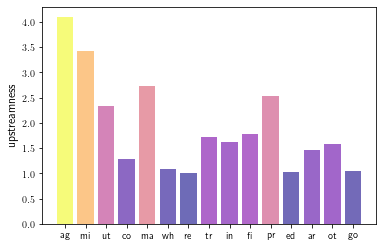

In [10]:
fig, ax = plt.subplots()
ax.bar(codes, upstreamness, color=upstreamness_color_list, alpha=0.6)

ax.set_ylabel("upstreamness", fontsize=12)

plt.savefig('figures/input_output_analysis_15_up.pdf')
plt.show()

### Eigenvector Centrality

In [11]:
ecentral = io.eigenvector_centrality(A)
ecentral_color_list = cm.plasma(io.to_zero_one(ecentral))

for c, u in zip(codes, ecentral):
    print(f'{c} = {u:.8f}')

ag = 0.09173512
mi = 0.07135759
ut = 0.01945803
co = 0.00986425
ma = 0.45264714
wh = 0.00477452
re = 0.00000007
tr = 0.02143569
in = 0.02232529
fi = 0.12074851
pr = 0.15927755
ed = 0.00042026
ar = 0.01409146
ot = 0.00900782
go = 0.00285671


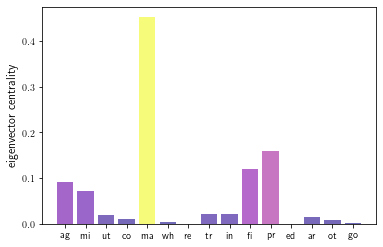

In [12]:
fig, ax = plt.subplots()
ax.bar(codes, ecentral, color=ecentral_color_list, alpha=0.6)

ax.set_ylabel("eigenvector centrality", fontsize=12)

plt.savefig('../figures/input_output_analysis_15_ec.pdf')
plt.show()

### Katz Centrality

In [13]:
kcentral = io.katz_centrality(A)
kcentral_color_list = cm.plasma(io.to_zero_one(kcentral))

for c, u in zip(codes, kcentral):
    print(f'{c} = {u:.2f}')

ag = 1.73
mi = 1.63
ut = 1.30
co = 1.16
ma = 5.23
wh = 1.07
re = 1.00
tr = 1.45
in = 1.49
fi = 3.14
pr = 3.52
ed = 1.04
ar = 1.27
ot = 1.18
go = 1.07


In [14]:
h = kcentral / len(A)   # the 'influence vector'

In [15]:
np.sqrt(np.sum(h**2))

0.5573180085189112

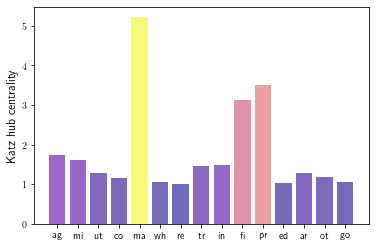

In [16]:
fig, ax = plt.subplots()
ax.bar(codes, kcentral, color=kcentral_color_list, alpha=0.6)

ax.set_ylabel("Katz hub centrality", fontsize=12)

plt.savefig('../figures/input_output_analysis_15_katz.pdf')
plt.show()

### Output Multipliers

In [17]:
omult = io.katz_centrality(A, authority=True)
omult_color_list = cm.plasma(io.to_zero_one(omult))

for c, u in zip(codes, omult):
    print(f'{c} = {u:.2f}')

ag = 2.35
mi = 1.89
ut = 1.58
co = 2.02
ma = 2.34
wh = 1.69
re = 1.71
tr = 1.86
in = 1.74
fi = 1.63
pr = 1.64
ed = 1.69
ar = 1.76
ot = 1.69
go = 1.68


A sanity check:

In [18]:
L = np.linalg.inv(np.identity(len(A)) - A)

np.ones(len(A)) @ L

array([2.35261594, 1.89118292, 1.5774868 , 2.01795867, 2.33534779,
       1.68824045, 1.70590797, 1.85615136, 1.73946028, 1.62839046,
       1.64088202, 1.68738155, 1.76281119, 1.69368424, 1.6838182 ])

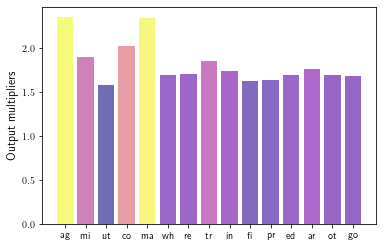

In [19]:
fig, ax = plt.subplots()
ax.bar(codes, omult, color=omult_color_list, alpha=0.6)

ax.set_ylabel("Output multipliers", fontsize=12)

plt.savefig('../figures/input_output_analysis_15_omult.pdf')
plt.show()

## Visualizations

Backward linkages

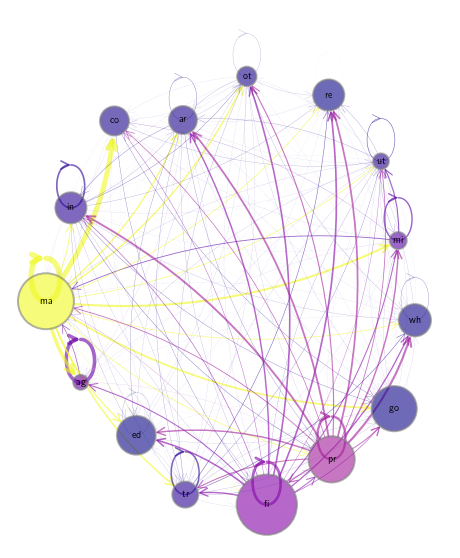

In [20]:
file_name='../figures/input_output_analysis_15.pdf'

fig, ax = plt.subplots(figsize=(8, 10))
plt.axis("off")

io.plot_graph(A, X, ax, codes, 
              layout_type='spring', # alternative layouts: spring, circular, random, spiral
              layout_seed=5432167,
              tol=0.0,
              node_color_list=ecentral_color_list) 

plt.savefig(file_name)
plt.show()

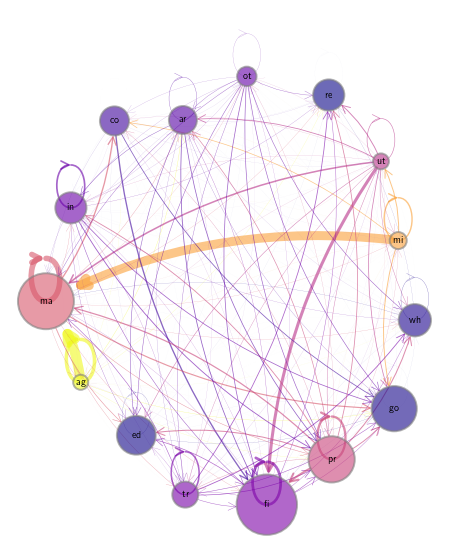

In [21]:
file_name='../figures/input_output_analysis_15_fwd.pdf'

fig, ax = plt.subplots(figsize=(8, 10))
plt.axis("off")

io.plot_graph(F, X, ax, codes, 
              layout_type='spring', # alternative layouts: spring, circular, random, spiral
              layout_seed=5432167,
              tol=0.0,
              node_color_list=upstreamness_color_list) 

plt.savefig(file_name)
plt.show()

#### The Leontief Matrix

In [22]:
I = np.identity(len(A))
L = np.linalg.inv(I - A)

In [23]:
L.flatten().shape

(225,)

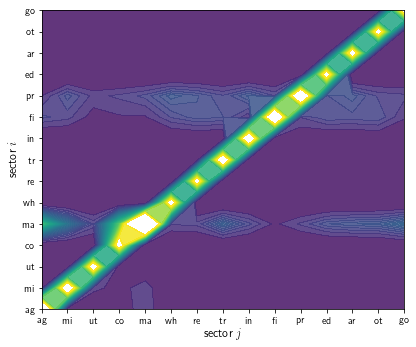

In [24]:
fig, ax = plt.subplots(figsize=(6.5, 5.5))
filename='../figures/input_output_analysis_15_leo.pdf'
io.plot_matrices(L, codes, ax, alpha=0.85)

plt.savefig(filename)
plt.show()

### Shock Propagation

In [25]:
sim_length = 6
N = len(A)
d = np.random.rand(N) # np.zeros(N)
d[6] = 1  # positive shock to agriculture
x = d
x_vecs = []
for i in range(sim_length):
    x_vecs.append(x)
    x = A @ x

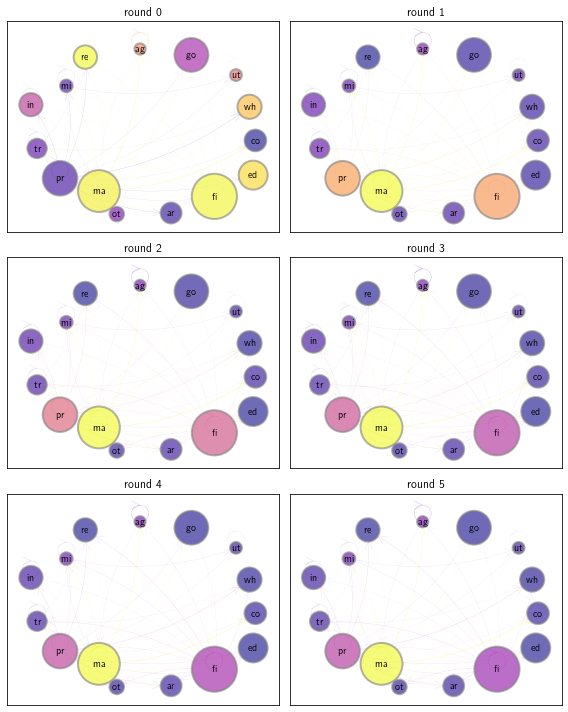

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

for ax, x_vec, i in zip(axes, x_vecs, range(sim_length)):
    ax.set_title(f"round {i}")
    x_vec_cols = cm.plasma(io.to_zero_one(x_vec))
    io.plot_graph(A, X, ax, codes,
                  layout_type='spring', # alternative layouts: spring, circular, random, spiral
                  layout_seed=342156,
                  node_color_list=x_vec_cols,
                  node_size_multiple=0.00028,
                  edge_size_multiple=0.8)

plt.tight_layout()
plt.savefig("../figures/input_output_analysis_15_shocks.pdf")
plt.show()